In [4]:
pip install xgboost

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

In [2]:
df = pd.read_csv('kc_house_data.csv')

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [12]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [13]:
df = df.drop('date', axis=1)
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [14]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

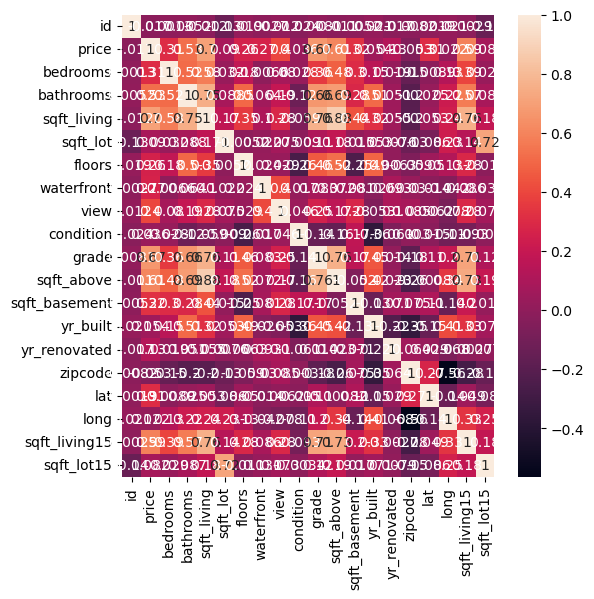

In [17]:
ax = plt.subplots(figsize = (6,6))
sns.heatmap(df.corr(),annot = True);

### Data Visualization 

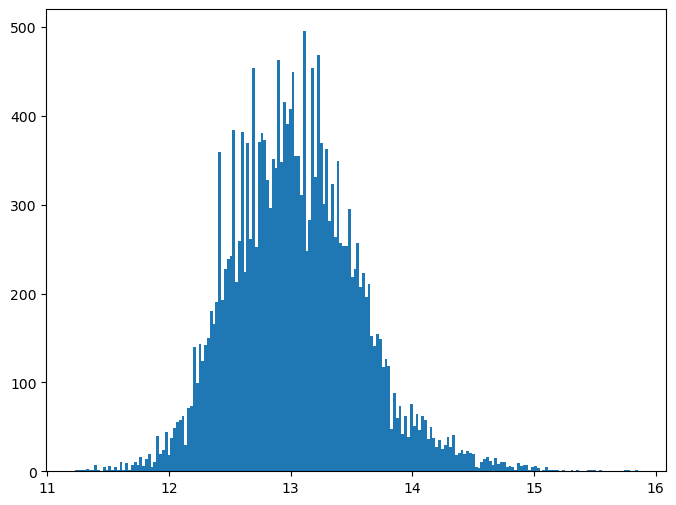

In [18]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.price)), bins=200);

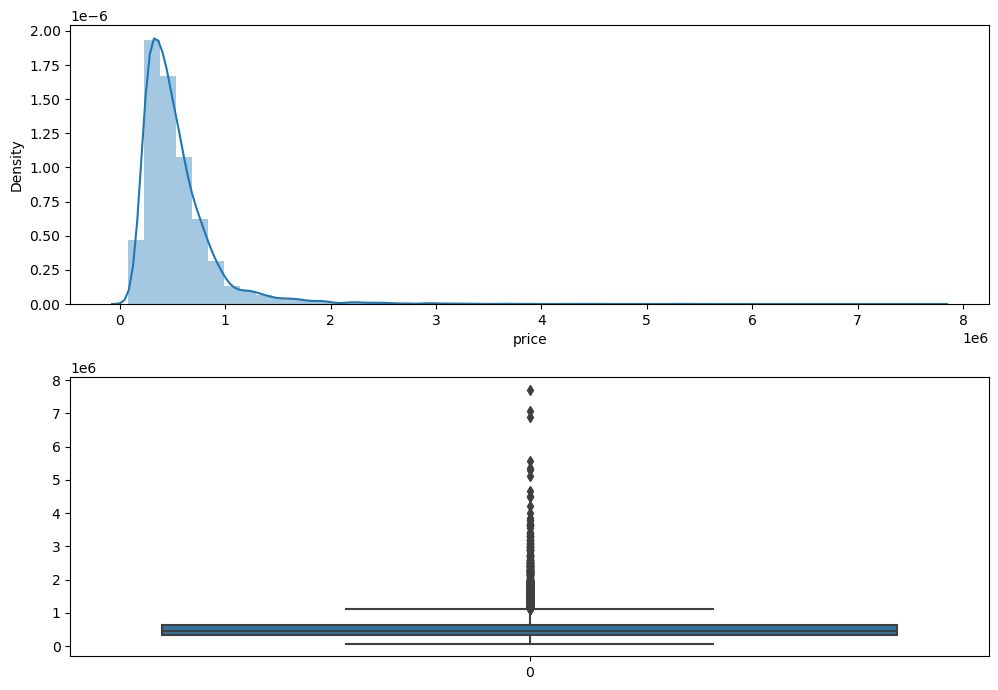

In [19]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout();

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

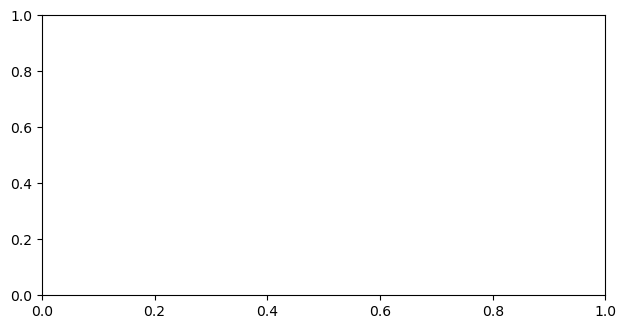

In [20]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price']);


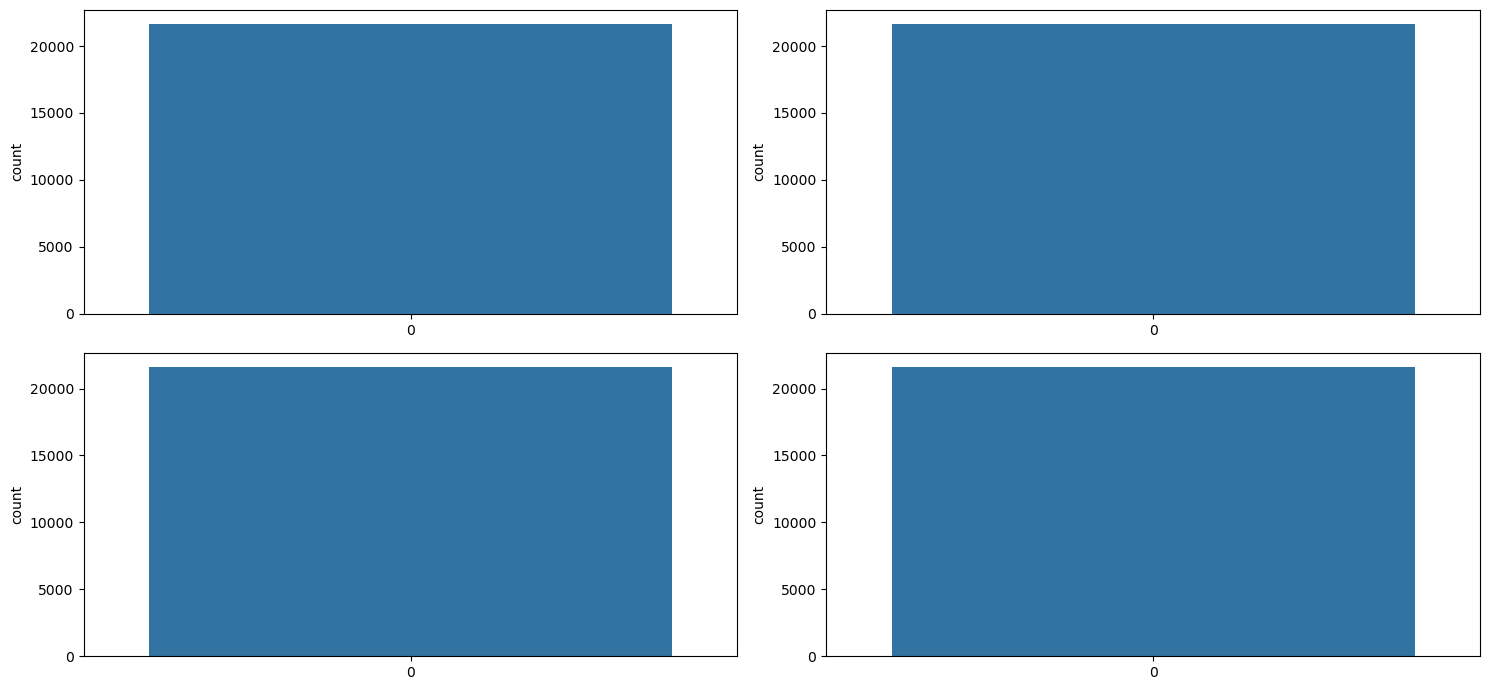

In [21]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])
plt.tight_layout()

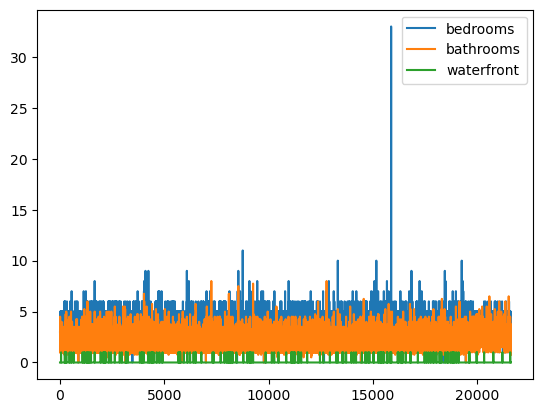

In [22]:
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend();

<Axes: >

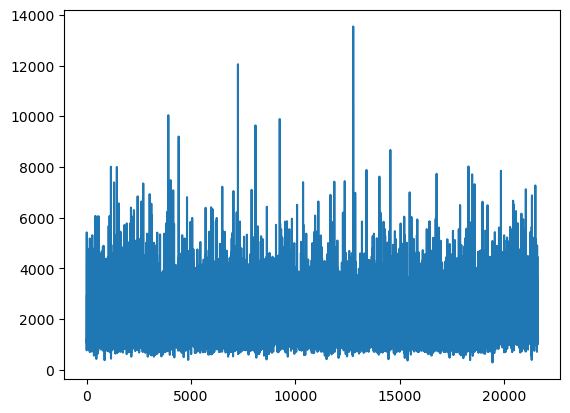

In [23]:
df.sqft_living.plot()

<Axes: >

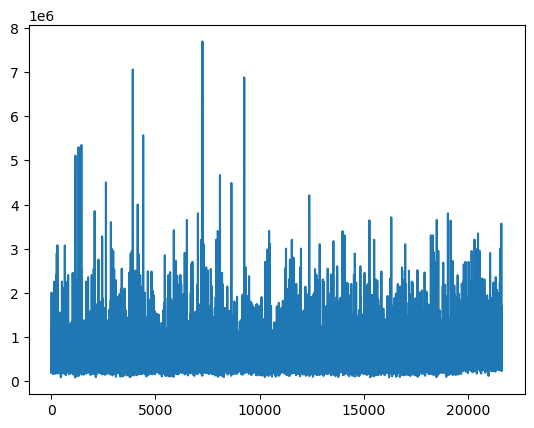

In [24]:
df.price.plot()

<Axes: >

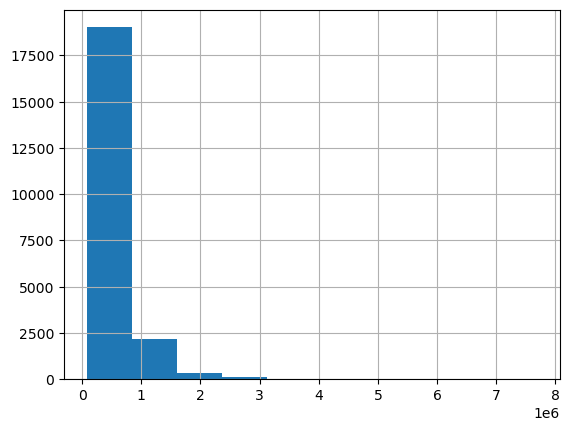

In [25]:
df.price.hist()

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)  
IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


### Feature Engineering 



In [27]:
df['zipcode']=df['zipcode'].astype("category")

In [28]:
df=df[df['bedrooms']<10]

In [29]:
df=df[df['bathrooms']<7]

In [30]:
df['bedrooms']=df['bedrooms']**2 

In [31]:
df['age']=2022-df['yr_built']

In [32]:
df['bathrooms']=df['bathrooms']**2

In [33]:
import numpy as np
df['basement']= np.where(df['sqft_basement']>0, 1, 0)
df['renovated'] = np.where(df['yr_renovated']>0, 1, 0)


In [34]:
df.quantile(.97).astype('int')

AssertionError: 

In [28]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

In [29]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
count,1.903400e+04,1.903400e+04,19034.000000,19034.000000,19034.000000,1.903400e+04,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000
mean,4.605181e+09,4.773170e+05,10.539298,4.460672,1904.438268,1.419396e+04,1.473022,0.003993,0.178733,3.405905,7.513607,1665.769360,238.668908,1970.569612,76.529106,47.557009,-122.215320,1899.057844,12217.817590,51.430388,0.361984,0.038352
std,2.882765e+09,2.229879e+05,4.291567,2.775137,712.456490,3.881017e+04,0.541476,0.063064,0.658054,0.648565,1.039517,685.907933,375.505783,29.231334,383.234216,0.141386,0.143035,599.843070,25571.381125,29.231334,0.480587,0.192051
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.000000,0.000000,0.000000
25%,2.130702e+09,3.100000e+05,9.000000,2.250000,1370.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,47.459625,-122.332000,1460.000000,5000.000000,26.000000,0.000000,0.000000
50%,3.904961e+09,4.300000e+05,9.000000,4.000000,1800.000000,7.440000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,47.567900,-122.238000,1780.000000,7500.000000,48.000000,0.000000,0.000000
75%,7.345201e+09,5.963750e+05,16.000000,6.250000,2350.000000,1.020000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,460.000000,1996.000000,0.000000,47.680075,-122.125000,2250.000000,9800.000000,71.000000,1.000000,0.000000
max,9.900000e+09,1.387800e+06,16.000000,25.000000,4133.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,4133.000000,2060.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,560617.000000,122.000000,1.000000,1.000000


In [30]:
x = df[['bedrooms','bathrooms','sqft_living','grade','zipcode','view','basement','waterfront','floors','age','renovated','condition','sqft_above']]

In [31]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,zipcode,view,basement,waterfront,floors,age,renovated,condition,sqft_above
0,9,1.0000,1180,7,98178,0,0,0,1.0,67,0,3,1180
1,9,5.0625,2570,7,98125,0,1,0,2.0,71,1,3,2170
2,4,1.0000,770,6,98028,0,0,0,1.0,89,0,3,770
3,16,9.0000,1960,7,98136,0,1,0,1.0,57,0,5,1050
4,9,4.0000,1680,8,98074,0,0,0,1.0,35,0,3,1680


In [32]:
y = df[['price']]

In [33]:
y.shape

(19034, 1)

In [34]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [35]:
x=pd.get_dummies(x,drop_first=True)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15227, 81), (3807, 81), (15227, 1), (3807, 1))

In [39]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,67,0,3,1180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,71,1,3,2170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,89,0,3,770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,57,0,5,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,35,0,3,1680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) 

In [41]:
y_pretest = regmodel.predict(x_test) 

In [42]:
(mean_squared_error(y_test,y_pretest))**0.5 

94991.51397724569

In [43]:
r2_score(y_test,y_pretest)

0.8237299515351554

In [44]:
from sklearn.linear_model import Ridge,Lasso

In [45]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test) 

In [46]:
(mean_squared_error(y_test,y_pred_ridge))**0.5 

95193.2327051809

In [48]:
r2_score(y_test,y_pred_ridge)

0.8229805219942001

In [49]:
#Lasso Regression

In [50]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([763980.59429729, 141327.32268193, 441794.63945023, ...,
       466716.00671149, 476467.03534674, 636094.38090563])

In [51]:
(mean_squared_error(y_test,y_pred_lasso))**0.5 

94993.66282186177

In [52]:
r2_score(y_test,y_pred_lasso)

0.823721976481111

In [53]:
#Elastic Net

In [54]:
from sklearn.linear_model import ElasticNet 

In [55]:
E = ElasticNet(l1_ratio = .8)

In [56]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [57]:
(mean_squared_error(y_test,y_pred_elastic))**0.5 

149163.85647479777

In [58]:
r2_score(y_test,y_pred_elastic)


0.5653535758807802

In [59]:
# ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test) 

In [60]:
(mean_squared_error(y_test,y_pred_etr))**0.5  

133919.6100820961

In [61]:
r2_score(y_test,y_pred_etr)

0.6496539243260411

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [64]:
y_pred_gbr = GBR.predict(x_test)

In [65]:
(mean_squared_error(y_test,y_pred_gbr))**0.5  

113139.58964474635

In [66]:
r2_score(y_test,y_pred_gbr)

0.749943525801124

In [67]:
#K- Neighbors  
from sklearn.neighbors import KNeighborsRegressor       
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [68]:
y_pred_knb = model.predict(x_test)

In [69]:
y_pred_knb.shape

(3807, 1)

In [70]:
(mean_squared_error(y_test,y_pred_knb))**0.5  


169533.29638986013

In [71]:
r2_score(y_test,y_pred_knb)


0.4385398752452335

In [72]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [73]:
y_pred_xgb = model.predict(x_test)

In [74]:
(mean_squared_error(y_test,y_pred_xgb))**0.5

94967.47973582265

In [75]:
r2_score(y_test,y_pred_xgb)

0.8238191380481974

In [79]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [80]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.825296,90958.241243,62852.587405
Linear,0.821629,91907.993982,65219.263376
Lasso,0.821626,91908.612308,65218.681776
Ridge,0.821142,92033.261935,65372.683666
Gradient Boosting,0.748351,109166.198330,82034.334494
Extra Tree,0.628595,132621.595474,88274.723404
ElasticNet,0.557071,144829.627287,111024.592554


In [81]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [82]:
y_test = np.array(list(y_test))
y_pred = np.array(pred)
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

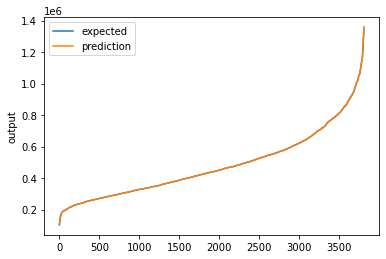

In [83]:
chart_regression(pred.flatten(),y_test.flatten())

In [96]:
#pip install keras

In [97]:
#pip install tensorflow

In [86]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [87]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [88]:
model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test),batch_size=128,epochs=1500)
model.summary()

Epoch 1/1500
119/119 [==============================] - 3s 10ms/step - loss: 271082668032.0000 - val_loss: 242553061376.0000
Epoch 2/1500
119/119 [==============================] - 1s 5ms/step - loss: 124387459072.0000 - val_loss: 26285469696.0000
Epoch 3/1500
119/119 [==============================] - 1s 5ms/step - loss: 33327464448.0000 - val_loss: 26029252608.0000
Epoch 4/1500
119/119 [==============================] - 1s 5ms/step - loss: 33060055040.0000 - val_loss: 25788340224.0000
Epoch 5/1500
119/119 [==============================] - 1s 5ms/step - loss: 32816095232.0000 - val_loss: 25530914816.0000
Epoch 6/1500
119/119 [==============================] - 1s 6ms/step - loss: 32550918144.0000 - val_loss: 25288931328.0000
Epoch 7/1500
119/119 [==============================] - 1s 6ms/step - loss: 32284454912.0000 - val_loss: 24997410816.0000
Epoch 8/1500
119/119 [==============================] - 1s 6ms/step - loss: 32014415872.0000 - val_loss: 24716636160.0000
Epoch 9/1500
119/119

119/119 [==============================] - 1s 5ms/step - loss: 13996811264.0000 - val_loss: 8462884864.0000
Epoch 134/1500
119/119 [==============================] - 1s 5ms/step - loss: 13945857024.0000 - val_loss: 7951072768.0000
Epoch 135/1500
119/119 [==============================] - 1s 5ms/step - loss: 13772513280.0000 - val_loss: 7961304576.0000
Epoch 136/1500
119/119 [==============================] - 1s 6ms/step - loss: 13658051584.0000 - val_loss: 7360732160.0000
Epoch 137/1500
119/119 [==============================] - 1s 5ms/step - loss: 13507300352.0000 - val_loss: 7355334144.0000
Epoch 138/1500
119/119 [==============================] - 1s 5ms/step - loss: 13362304000.0000 - val_loss: 7160136192.0000
Epoch 139/1500
119/119 [==============================] - 1s 5ms/step - loss: 13255047168.0000 - val_loss: 7143922176.0000
Epoch 140/1500
119/119 [==============================] - 1s 5ms/step - loss: 13246137344.0000 - val_loss: 7038828032.0000
Epoch 141/1500
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 9300598784.0000 - val_loss: 3326819072.0000
Epoch 267/1500
119/119 [==============================] - 1s 5ms/step - loss: 9309206528.0000 - val_loss: 3725353984.0000
Epoch 268/1500
119/119 [==============================] - 1s 5ms/step - loss: 9293769728.0000 - val_loss: 3313675776.0000
Epoch 269/1500
119/119 [==============================] - 1s 5ms/step - loss: 9221076992.0000 - val_loss: 3325991936.0000
Epoch 270/1500
119/119 [==============================] - 1s 5ms/step - loss: 9310329856.0000 - val_loss: 3323220224.0000
Epoch 271/1500
119/119 [==============================] - 1s 5ms/step - loss: 9245785088.0000 - val_loss: 3297195520.0000
Epoch 272/1500
119/119 [==============================] - 1s 5ms/step - loss: 9249160192.0000 - val_loss: 3320527104.0000
Epoch 273/1500
119/119 [==============================] - 1s 5ms/step - loss: 9320916992.0000 - val_loss: 3355250176.0000
Epoch 274/1500
119/119 [===============

119/119 [==============================] - 1s 5ms/step - loss: 8526520320.0000 - val_loss: 2908732928.0000
Epoch 401/1500
119/119 [==============================] - 1s 5ms/step - loss: 8709185536.0000 - val_loss: 2867622656.0000
Epoch 402/1500
119/119 [==============================] - 1s 5ms/step - loss: 8452819456.0000 - val_loss: 2834618112.0000
Epoch 403/1500
119/119 [==============================] - 1s 5ms/step - loss: 8503284224.0000 - val_loss: 3634087424.0000
Epoch 404/1500
119/119 [==============================] - 1s 5ms/step - loss: 8473076224.0000 - val_loss: 2854770176.0000
Epoch 405/1500
119/119 [==============================] - 1s 6ms/step - loss: 8636161024.0000 - val_loss: 2975442688.0000
Epoch 406/1500
119/119 [==============================] - 1s 7ms/step - loss: 8492292096.0000 - val_loss: 2905588480.0000
Epoch 407/1500
119/119 [==============================] - 1s 6ms/step - loss: 8492431872.0000 - val_loss: 2869289984.0000
Epoch 408/1500
119/119 [===============

119/119 [==============================] - 1s 5ms/step - loss: 8326473216.0000 - val_loss: 3402956032.0000
Epoch 535/1500
119/119 [==============================] - 1s 5ms/step - loss: 8188744192.0000 - val_loss: 2802733312.0000
Epoch 536/1500
119/119 [==============================] - 1s 6ms/step - loss: 8321751040.0000 - val_loss: 2814108416.0000
Epoch 537/1500
119/119 [==============================] - 1s 5ms/step - loss: 8281906176.0000 - val_loss: 2971969792.0000
Epoch 538/1500
119/119 [==============================] - 1s 6ms/step - loss: 8211956224.0000 - val_loss: 2929502976.0000
Epoch 539/1500
119/119 [==============================] - 1s 6ms/step - loss: 8311523328.0000 - val_loss: 2952727296.0000
Epoch 540/1500
119/119 [==============================] - 1s 5ms/step - loss: 8470069248.0000 - val_loss: 3490431232.0000
Epoch 541/1500
119/119 [==============================] - 1s 6ms/step - loss: 8363607040.0000 - val_loss: 2919880192.0000
Epoch 542/1500
119/119 [===============

119/119 [==============================] - 1s 6ms/step - loss: 8100234752.0000 - val_loss: 2921366784.0000
Epoch 669/1500
119/119 [==============================] - 1s 5ms/step - loss: 8076981248.0000 - val_loss: 3202333184.0000
Epoch 670/1500
119/119 [==============================] - 1s 5ms/step - loss: 8079082496.0000 - val_loss: 2727728640.0000
Epoch 671/1500
119/119 [==============================] - 1s 5ms/step - loss: 8115551744.0000 - val_loss: 2827495680.0000
Epoch 672/1500
119/119 [==============================] - 1s 5ms/step - loss: 8087456256.0000 - val_loss: 2855921920.0000
Epoch 673/1500
119/119 [==============================] - 1s 5ms/step - loss: 8178539520.0000 - val_loss: 2891174912.0000
Epoch 674/1500
119/119 [==============================] - 1s 5ms/step - loss: 8088965120.0000 - val_loss: 2754212096.0000
Epoch 675/1500
119/119 [==============================] - 1s 5ms/step - loss: 8078126080.0000 - val_loss: 3079156736.0000
Epoch 676/1500
119/119 [===============

119/119 [==============================] - 1s 5ms/step - loss: 7923377664.0000 - val_loss: 2723312640.0000
Epoch 803/1500
119/119 [==============================] - 1s 5ms/step - loss: 7871622656.0000 - val_loss: 2822460672.0000
Epoch 804/1500
119/119 [==============================] - 1s 5ms/step - loss: 8110196224.0000 - val_loss: 2689187328.0000
Epoch 805/1500
119/119 [==============================] - 1s 5ms/step - loss: 8009477632.0000 - val_loss: 2735390976.0000
Epoch 806/1500
119/119 [==============================] - 1s 5ms/step - loss: 8013618688.0000 - val_loss: 2855193088.0000
Epoch 807/1500
119/119 [==============================] - 1s 5ms/step - loss: 7897703936.0000 - val_loss: 2862743552.0000
Epoch 808/1500
119/119 [==============================] - 1s 5ms/step - loss: 8130990080.0000 - val_loss: 2695380992.0000
Epoch 809/1500
119/119 [==============================] - 1s 5ms/step - loss: 7933051392.0000 - val_loss: 2779245056.0000
Epoch 810/1500
119/119 [===============

119/119 [==============================] - 1s 5ms/step - loss: 7943155200.0000 - val_loss: 2848689920.0000
Epoch 937/1500
119/119 [==============================] - 1s 5ms/step - loss: 7778270208.0000 - val_loss: 3465410048.0000
Epoch 938/1500
119/119 [==============================] - 1s 6ms/step - loss: 8068987392.0000 - val_loss: 3018008576.0000
Epoch 939/1500
119/119 [==============================] - 1s 5ms/step - loss: 7830486016.0000 - val_loss: 2764430336.0000
Epoch 940/1500
119/119 [==============================] - 1s 6ms/step - loss: 7916629504.0000 - val_loss: 2786059008.0000
Epoch 941/1500
119/119 [==============================] - 1s 7ms/step - loss: 7871843840.0000 - val_loss: 2849317888.0000
Epoch 942/1500
119/119 [==============================] - 1s 7ms/step - loss: 7755603968.0000 - val_loss: 2830790144.0000
Epoch 943/1500
119/119 [==============================] - 1s 8ms/step - loss: 7831500800.0000 - val_loss: 2717752064.0000
Epoch 944/1500
119/119 [===============

Epoch 1070/1500
119/119 [==============================] - 1s 5ms/step - loss: 7757141504.0000 - val_loss: 2744170752.0000
Epoch 1071/1500
119/119 [==============================] - 1s 6ms/step - loss: 7714161664.0000 - val_loss: 3662730240.0000
Epoch 1072/1500
119/119 [==============================] - 1s 6ms/step - loss: 7749012992.0000 - val_loss: 2640067840.0000
Epoch 1073/1500
119/119 [==============================] - 1s 5ms/step - loss: 7758351872.0000 - val_loss: 3191450368.0000
Epoch 1074/1500
119/119 [==============================] - 1s 5ms/step - loss: 7875567616.0000 - val_loss: 2902332160.0000
Epoch 1075/1500
119/119 [==============================] - 1s 7ms/step - loss: 7650571776.0000 - val_loss: 2688550144.0000
Epoch 1076/1500
119/119 [==============================] - 1s 7ms/step - loss: 7858574336.0000 - val_loss: 2872915968.0000
Epoch 1077/1500
119/119 [==============================] - 1s 6ms/step - loss: 7698265600.0000 - val_loss: 2705091328.0000
Epoch 1078/1500


Epoch 1203/1500
119/119 [==============================] - 1s 6ms/step - loss: 7702051328.0000 - val_loss: 2821316352.0000
Epoch 1204/1500
119/119 [==============================] - 1s 6ms/step - loss: 7588794880.0000 - val_loss: 2824427008.0000
Epoch 1205/1500
119/119 [==============================] - 1s 6ms/step - loss: 7733231616.0000 - val_loss: 2726831872.0000
Epoch 1206/1500
119/119 [==============================] - 1s 6ms/step - loss: 7624852992.0000 - val_loss: 2665658624.0000
Epoch 1207/1500
119/119 [==============================] - 1s 6ms/step - loss: 7669517312.0000 - val_loss: 2955777280.0000
Epoch 1208/1500
119/119 [==============================] - 1s 5ms/step - loss: 7692710400.0000 - val_loss: 2684987136.0000
Epoch 1209/1500
119/119 [==============================] - 1s 5ms/step - loss: 7694523904.0000 - val_loss: 2627606528.0000
Epoch 1210/1500
119/119 [==============================] - 1s 6ms/step - loss: 7649941504.0000 - val_loss: 3152506624.0000
Epoch 1211/1500


Epoch 1336/1500
119/119 [==============================] - 1s 5ms/step - loss: 7612066304.0000 - val_loss: 2945760768.0000
Epoch 1337/1500
119/119 [==============================] - 1s 5ms/step - loss: 7616753152.0000 - val_loss: 2823044864.0000
Epoch 1338/1500
119/119 [==============================] - 1s 5ms/step - loss: 7644549120.0000 - val_loss: 2676279040.0000
Epoch 1339/1500
119/119 [==============================] - 1s 5ms/step - loss: 7649591296.0000 - val_loss: 3354734592.0000
Epoch 1340/1500
119/119 [==============================] - 1s 5ms/step - loss: 7451650560.0000 - val_loss: 2754561792.0000
Epoch 1341/1500
119/119 [==============================] - 1s 5ms/step - loss: 7493000704.0000 - val_loss: 3172166400.0000
Epoch 1342/1500
119/119 [==============================] - 1s 8ms/step - loss: 7464699392.0000 - val_loss: 3514665472.0000
Epoch 1343/1500
119/119 [==============================] - 1s 7ms/step - loss: 7472660480.0000 - val_loss: 2573165824.0000
Epoch 1344/1500


Epoch 1469/1500
119/119 [==============================] - 1s 7ms/step - loss: 7479626752.0000 - val_loss: 2648336640.0000
Epoch 1470/1500
119/119 [==============================] - 1s 7ms/step - loss: 7400335872.0000 - val_loss: 2593464576.0000
Epoch 1471/1500
119/119 [==============================] - 1s 6ms/step - loss: 7485106176.0000 - val_loss: 2736229120.0000
Epoch 1472/1500
119/119 [==============================] - 1s 6ms/step - loss: 7434547200.0000 - val_loss: 2631333632.0000
Epoch 1473/1500
119/119 [==============================] - 1s 6ms/step - loss: 7626547712.0000 - val_loss: 3010010112.0000
Epoch 1474/1500
119/119 [==============================] - 1s 6ms/step - loss: 7509287936.0000 - val_loss: 2712240896.0000
Epoch 1475/1500
119/119 [==============================] - 1s 6ms/step - loss: 7434634240.0000 - val_loss: 2666830080.0000
Epoch 1476/1500
119/119 [==============================] - 1s 6ms/step - loss: 7569082368.0000 - val_loss: 2568847360.0000
Epoch 1477/1500


<AxesSubplot:>

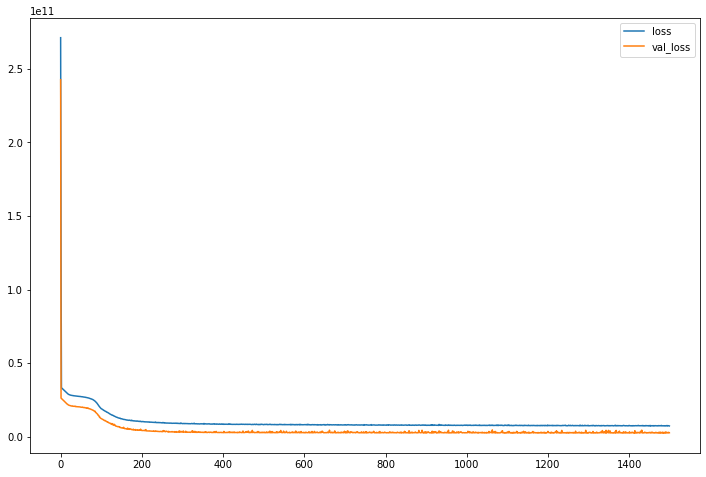

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [90]:
pred=model.predict(x_test)

119/119 [==============================] - 1s 3ms/step


In [91]:
(mean_squared_error(y_test,pred))**0.5  

52422.7883272151

In [92]:
r2_score(y_test,pred)

0.9362190391632771

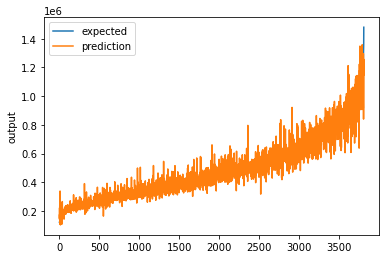

In [93]:
chart_regression(y_test.flatten(),pred.flatten())

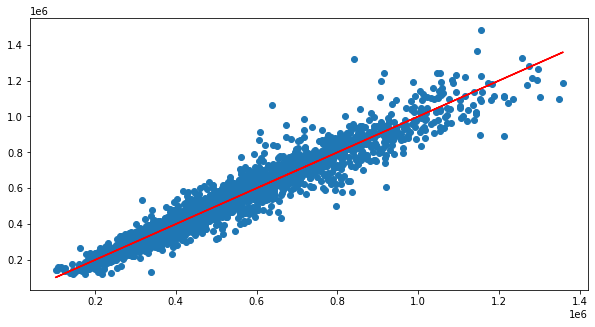

In [94]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,pred)
# Perfect predictions
plt.plot(y_test,y_test,'r');

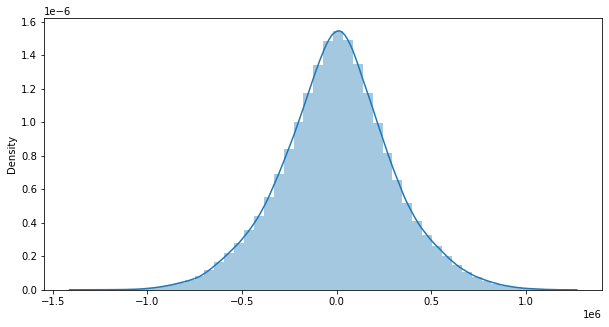

In [95]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- pred)
sns.distplot(residuals);